In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame
from sklearn import datasets, svm
import  scipy.stats as stats
import scipy
from sklearn.svm import LinearSVC
from scipy import interpolate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import  cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from scipy.sparse import hstack
from sklearn.feature_selection import chi2
from scipy.stats import mode
import time
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import pairwise_kernels
import re
from nltk.corpus import stopwords
from dateutil.parser import parse
import nltk,string
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
import pylab as pl
from math import log
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import ast
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
%matplotlib inline
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import collections
import numpy as np
import itertools
from pandas.io.json import json_normalize
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing


In [3]:
#Read File
train_data = pd.read_csv('training_set_dedup',sep = '\t', dtype = None)
test_data_json = pd.read_csv('test_set_dedup',sep = '\t', dtype = None)

### ANALYZING DATA IN FILE

In [4]:
# read the entire file into a python array
with open('training_set_dedup', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"



In [5]:
with open('test_set_dedup', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data_test = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_test_json_str = "[" + ','.join(data_test) + "]"



In [6]:
# now, load it into pandas
data_df = pd.read_json(data_json_str, orient='columns')

In [7]:
data_test_df = pd.read_json(data_test_json_str, orient='columns')

### Decompose Results Section (into peinfo and sha256)

In [8]:
data_sha_peinfo = data_df['results'].apply(pd.Series)['peinfo']
data_test_sha_peinfo = data_test_df['peinfo'].apply(pd.Series)

In [9]:
train_df = pd.concat((data_df , data_sha_peinfo),axis=1).drop(['results'], 1)
test_df = pd.concat((data_test_df , data_test_sha_peinfo),axis=1).drop(['peinfo'], 1)

In [10]:
#train_df.info()

In [30]:
data_sha_peinfo

0       {u'exports': [{u'function': u'GetCommandManage...
1       {u'rich_header': {u'checksum': 999532743, u'sh...
2       {u'exports': [{u'function': u'DllCanUnloadNow'...
3       {u'exports': [{u'function': u'CsrAddStaticServ...
4       {u'exports': [{u'function': u'DllRegisterServe...
5       {u'rich_header': {u'checksum': 2340238229, u's...
6       {u'rich_header': {u'checksum': 4072896621, u's...
7       {u'exports': [{u'function': u'DllCanUnloadNow'...
8       {u'exports': [{u'function': u'CreateCab'}, {u'...
9       {u'rich_header': {u'checksum': 1326690599, u's...
10      {u'exports': [{u'function': u'?initialize@VSAF...
11      {u'exports': [{u'function': u'DllCanUnloadNow'...
12      {u'exports': [{u'function': u'??0?$CComObjectR...
13      {u'rich_header': {u'checksum': 415928504, u'sh...
14      {u'rich_header': {u'checksum': 2329397631, u's...
15      {u'exports': [{u'function': u'DllCanUnloadNow'...
16      {u'exports': [{u'function': u'CompareLinkInfoR...
17      {u'exp

### Decompose peinfo(Make keys as features)

In [10]:
data_peinfo = train_df['peinfo'].apply(pd.Series)

In [11]:
data_total_train = pd.concat((train_df , data_peinfo),axis=1).drop(['peinfo'],1)


### Mapping beign to 0 and malicious to 1

In [12]:
mymap_cat = {'benign': 0, 'malicious': 1}
data_total_train['label'] =data_total_train['label'].map(mymap_cat).astype(int)

In [13]:
new_train_features = data_total_train.drop(['sha256','imphash','pehash','timestamp'],1)
new_test_features = test_df.drop(['sha256','imphash','pehash','timestamp'],1)


In [14]:
new_test_features.version_var.astype(str).value_counts()

[]     34599
nan    12185
Name: version_var, dtype: int64

In [15]:
new_train_features.version_var.astype(str).value_counts()

[]     7298
nan    2456
Name: version_var, dtype: int64

In [16]:
new_train_features.thread_local_storage[9743]

[{u'Callback Function': 0, u'TLS Callback Function': u'0x004025a0'},
 {u'Callback Function': 1, u'TLS Callback Function': u'0x00402560'}]

### Decompose rich_header (Analyze checksum	,sha256,	values_parsed	,values_raw)

In [17]:
data_rich_header = data_total_train['rich_header'].apply(pd.Series)[['values_parsed','values_raw','checksum']]
data_test_rich_header = test_df['rich_header'].apply(pd.Series)[['values_parsed','values_raw','checksum']]

In [20]:
# data_test_rich_header

In [18]:
data_rich_header = data_rich_header.rename(columns = {'values_parsed':'peinfoHeader_values_parsed','values_raw':'peinfoHeader_values_raw','checksum':'peinfoHeader_checksum'})
data_test_rich_header = data_test_rich_header.rename(columns = {'values_parsed':'peinfoHeader_values_parsed','values_raw':'peinfoHeader_values_raw','checksum':'peinfoHeader_checksum'})

In [22]:
# data_test_rich_header.peinfoHeader_values_raw.value_counts()

In [102]:
data_train = pd.concat((data_total_train , data_rich_header),axis=1).drop(['rich_header'],1).fillna(0)
data_test = pd.concat((test_df , data_test_rich_header),axis=1).drop(['rich_header'],1).fillna(0)

In [103]:
new_train_features['peinfoHeader_checksum'] = data_train['peinfoHeader_checksum'].fillna(0)
new_test_features['peinfoHeader_checksum'] = data_test['peinfoHeader_checksum'].fillna(0)

### Basic preprocessing convert (keys)Unicode to string  and dict to list 

In [104]:
def convert(data):
    if isinstance(data, basestring):
        return str(data)
    elif isinstance(data, collections.Mapping):
        return dict(map(convert, data.iteritems()))
    elif isinstance(data, collections.Iterable):
        return type(data)(map(convert, data))
    else:
        return data

In [105]:
def dicttolistOHE(df_col):
    XFeatures = []
    for i in range(len(df_col)):
        XFeatures.append([])
        result = collections.defaultdict(list)
        if isinstance(df_col[i],list):
            for d in df_col[i]:
                for k, v in d.items():
                    result[k].append(v)
            XFeatures[i].append(dict(result))
        else:
            XFeatures[i].append(0)
    return XFeatures

### Decompose Debug

In [23]:
debug_section = data_train['debug'].apply(pd.Series)
debug_section_test = data_test['debug'].apply(pd.Series)


In [24]:
debug_section_list  = debug_section[0].apply(pd.Series)
debug_section_list_test  = debug_section_test[0].apply(pd.Series)

In [25]:
debug_section_list=debug_section_list.drop([0],1)
debug_section_list_test=debug_section_list_test.drop([0],1)

In [26]:
debug_fix=debug_section_list[['subtype','DebugSig','DebugAge','SizeOfData','Type','MajorVersion','MinorVersion']]
debug_fix=debug_fix.fillna(0)
debug_fix_test=debug_section_list_test[['subtype','DebugSig','DebugAge','SizeOfData','Type','MajorVersion','MinorVersion']]
debug_fix_test=debug_fix_test.fillna(0)

In [412]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9754 entries, 0 to 9753
Data columns (total 27 columns):
label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [27]:
mymap_debug_subtype = {0: 0, 'pe_debug': 1}
debug_fix['subtype'] =debug_fix['subtype'].map(mymap_debug_subtype).astype(int)

In [28]:
debug_fix_test['subtype'] =debug_fix_test['subtype'].map(mymap_debug_subtype).astype(int)

In [29]:
mymap_debug = {0: 0, 'RSDS': 1,'NB10': 2}
debug_fix['DebugSig'] =debug_fix['DebugSig'].map(mymap_debug).astype(int)

In [30]:
debug_fix_test['DebugSig'] =debug_fix_test['DebugSig'].map(mymap_debug).astype(int)

In [31]:
data_train = pd.concat((data_train , debug_fix),axis=1).drop(['debug'],1).fillna(0)
data_test = pd.concat((data_test, debug_fix_test),axis=1).drop(['debug'],1).fillna(0)

### Decompose thread_local_storage

In [106]:
Xthread_local_storage = dicttolistOHE(data_train['thread_local_storage'])
Xthread_local_storage_test = dicttolistOHE(data_test['thread_local_storage'])

In [58]:
Xthread_local_storage_test

[[0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{u'Callback Function': [0], u'TLS Callback Function': [u'0x1004ad87']}],
 [0],
 [0],
 [0],
 [0],
 [0],
 

In [107]:
data_train['Xthread_local_storage']  = [val for sublist in Xthread_local_storage for val in sublist]
data_test['Xthread_local_storage']  = [val for sublist in Xthread_local_storage_test for val in sublist]

In [29]:
Xthread_local_storage_test 

[[0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [{}],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{}],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [{u'Callback Function': [0], u'TLS Callback Function': [u'0x1004ad87']}],
 [0],
 [0],
 [0],
 [0],
 [0],
 

In [108]:
data_thread  = data_train['Xthread_local_storage'].apply(pd.Series).drop([0],1)
data_thread_test  = data_test['Xthread_local_storage'].apply(pd.Series).drop([0],1)

In [247]:
data_thread

,Callback_Function,TLS_Callback_Function
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [109]:
data_thread = data_thread.rename(columns = {"Callback Function":"Callback_Function",'TLS Callback Function':'TLS_Callback_Function'})
data_thread_test  = data_thread_test.rename(columns = {"Callback Function":"Callback_Function",'TLS Callback Function':'TLS_Callback_Function'})


### Preprocessing rich_header( peinfoHeader_values_parsed &	peinfoHeader_values_raw)

In [110]:
XFeatures = dicttolistOHE(data_train['peinfoHeader_values_parsed'])
XFeatures_test = dicttolistOHE(data_test['peinfoHeader_values_parsed'])

In [111]:
data_train['peinfoHeader_values_parsed']  = [val for sublist in XFeatures for val in sublist]
data_test['peinfoHeader_values_parsed']  = [val for sublist in XFeatures_test for val in sublist]

In [112]:
data_new  = data_train['peinfoHeader_values_parsed'].apply(pd.Series)
data_test_new  = data_test['peinfoHeader_values_parsed'].apply(pd.Series)

In [113]:
data_valuesparsed = data_new.drop([0],1)
data_test_valuesparsed = data_test_new.drop([0],1)

In [114]:
def getOHE(col_train,col_test):
    encoded = pd.get_dummies(pd.concat([col_train.astype(str),col_test.astype(str)], axis=0))
    train_rows = col_train.values.shape[0]
    train_encoded = encoded.iloc[:train_rows, :]
    test_encoded = encoded.iloc[train_rows:, :]
    return train_encoded,test_encoded

In [115]:
def limitedOHE(col,threshold,name):
    values = pd.Series(col).astype(str)
    counts_train = col.astype(str).value_counts()
    mask_id = values.isin(counts_train[counts_train > threshold].index)
    values[~mask_id] = "-"+ name
    new_dataOHE = pd.get_dummies(values)
    return new_dataOHE

def limitedOHEtrain(col_train,col_test,threshold,name):
    new_col = pd.concat([col_train.astype(str),col_test.astype(str)], axis=0)
    values = pd.Series(new_col).astype(str)
    counts_train = new_col.astype(str).value_counts()
    mask_id = values.isin(counts_train[counts_train > threshold].index)
    values[~mask_id] = "-"+ name
    encoded = pd.get_dummies(values)
    train_rows = col_train.values.shape[0]
    train_encoded = encoded.iloc[:train_rows, :]
    test_encoded = encoded.iloc[train_rows:, :]
    return train_encoded,test_encoded


def selectBestFeaturesUnivariate(X,y,k_features):
    features = SelectKBest(chi2,k=k_features)
    X_k_features = features.fit_transform(X, y)
    top_ranked_features = sorted(enumerate(features.scores_),key=lambda x:x[1], reverse=True)[:k_features]
    top_ranked_features_indices = map(list,zip(*top_ranked_features))[0]
    return X_k_features,top_ranked_features_indices

### One Hot Encoding Rich Header

In [116]:

header_times_used_OHE ,header_testtimes_used_OHE = getOHE(data_valuesparsed.times_used,data_test_valuesparsed.times_used)
header_version_OHE, header_testversion_OHE = getOHE(data_valuesparsed.version,data_test_valuesparsed.version)
header_id_OHE,header_testid_OHE = getOHE(data_valuesparsed.id,data_test_valuesparsed.id)

In [117]:
header_valuesraw_OHE ,header_valuesraw_test_OHE = limitedOHEtrain(data_train.peinfoHeader_values_raw,data_test.peinfoHeader_values_raw,5,"values_raw")

In [118]:
header_times_used_sel ,header_testtimes_used_idx = selectBestFeaturesUnivariate(header_times_used_OHE,data_train["label"],500)
header_testtimes_used_sel = header_testtimes_used_OHE.iloc[:,header_testtimes_used_idx]

In [119]:
header_version_sel ,header_testversion_used_idx = selectBestFeaturesUnivariate(header_times_used_OHE,data_train["label"],500)
header_versiontest_sel = header_testtimes_used_OHE.iloc[:,header_testtimes_used_idx]

In [120]:
header_id_sel ,header_testid_used_idx = selectBestFeaturesUnivariate(header_id_OHE,data_train["label"],500)
header_testid_used_sel = header_testtimes_used_OHE.iloc[:,header_testid_used_idx]

In [121]:
header_valuesraw_OHE.as_matrix().shape

(9754, 514)

### One hot encoding of thread local storage

In [122]:
thread_local_storage_OHE ,thread_testlocal_storage_OHE = getOHE(data_thread.Callback_Function,data_thread_test.Callback_Function)

In [123]:
thread_local_storagetls_OHE ,thread_testlocaltls_storage_OHE = getOHE(data_thread.TLS_Callback_Function,data_thread_test.TLS_Callback_Function)

In [124]:
frames = [header_times_used_sel,header_version_sel,header_id_sel,header_valuesraw_OHE.as_matrix(),thread_local_storage_OHE,thread_local_storagetls_OHE]
frames_test = [header_testtimes_used_sel,header_versiontest_sel,header_testid_used_sel,header_valuesraw_test_OHE,thread_testlocal_storage_OHE,thread_testlocaltls_storage_OHE]

In [125]:
headertrain_OHE = np.concatenate(frames, axis=1)
headertest_OHE = pd.concat(frames_test, axis=1)

In [126]:
headertest_OHE.shape

(46784, 2257)

In [50]:
# data_header_valuesId = MultiLabelBinarizer().fit_transform(data_valuesparsed['id'].fillna('[0]'))
# data_header_times_used = MultiLabelBinarizer().fit_transform(data_valuesparsed['times_used'].fillna('[0]'))
# data_headerversion = MultiLabelBinarizer().fit_transform(data_valuesparsed['version'].fillna('[0]'))                                                             


In [51]:
# data_testheader_valuesId = MultiLabelBinarizer().fit_transform(data_test_valuesparsed['id'].fillna('[0]'))
# data_testheader_times_used = MultiLabelBinarizer().fit_transform(data_test_valuesparsed['times_used'].fillna('[0]'))
# data_testheaderversion = MultiLabelBinarizer().fit_transform(data_test_valuesparsed['version'].fillna('[0]'))      

In [52]:
# header_id_OHE = pd.get_dummies(data_valuesparsed.id.astype(str),prefix=['id'],sparse = True)
# header_testid_OHE = pd.get_dummies(data_test_valuesparsed.id.astype(str),prefix=['id'],sparse = True)
# header_times_used_OHE = pd.get_dummies(data_valuesparsed.times_used.astype(str),prefix=['times_used'],sparse = True)
# header_testtimes_used_OHE = pd.get_dummies(data_test_valuesparsed.times_used.astype(str),prefix=['times_used'],sparse = True)
# header_version_OHE = pd.get_dummies(data_valuesparsed.version.astype(str),prefix=['version'],sparse = True)
# header_testversion_OHE = pd.get_dummies(data_test_valuesparsed.version.astype(str),prefix=['version'],sparse = True)

In [53]:
# df_1 = pd.DataFrame(data_header_valuesId).add_suffix('_df1Header_valuesId')
# dftest_1 =  pd.DataFrame(data_testheader_valuesId).add_suffix('_df1testHeader_valuesId')

In [54]:
# df_2 = pd.DataFrame(data_header_times_used).add_suffix('_df2Header_times_used')
# dtestt_2 = pd.DataFrame(data_testheader_times_used).add_suffix('_df2testHeader_times_used')

In [55]:
# df_3 = pd.DataFrame(data_headerversion).add_suffix('_df3Header_headerversion')
# dftest_3 = pd.DataFrame(data_testheaderversion).add_suffix('_df3testHeader_headerversion')


### Number of Pe_Sections

In [127]:
data_train['pe_sections'] = data_train['pe_sections'].fillna('[0]')
data_test['pe_sections'] = data_test['pe_sections'].fillna('[0]')

In [128]:
number_pesection = []
for i in range(len(data_train['pe_sections'])):
    number_pesection.append([])
    if isinstance(data_train['pe_sections'][i],list):
#         print i , len(data_train['pe_sections'][i])
        number_pesection[i].append(len(data_train['pe_sections'][i]))
    else:
        number_pesection[i].append(0)

number_testpesection = []
for i in range(len(data_test['pe_sections'])):
    number_testpesection.append([])
    if isinstance(data_test['pe_sections'][i],list):
#         print i , len(data_train['pe_sections'][i])
        number_testpesection[i].append(len(data_test['pe_sections'][i]))
    else:
        number_testpesection[i].append(0)       
    

In [129]:
data_train['number_pesection'] = [val for sublist in number_pesection for val in sublist]
data_test['number_pesection'] = [val for sublist in number_testpesection for val in sublist]

In [130]:
headertrain_OHE = pd.concat([pd.DataFrame(headertrain_OHE),data_train['number_pesection'],data_train['peinfoHeader_checksum'] ] ,axis=1)

In [131]:
headertest_OHE = pd.concat([headertest_OHE,data_test['number_pesection'] ,data_test['peinfoHeader_checksum'] ] ,axis=1)

#### Mean,Median,Mode Entropy per Section

In [132]:
data_train['peinfoHeader_pesection']  = dicttolistOHE(data_train['pe_sections'])
data_test['peinfoHeader_pesection']  = dicttolistOHE(data_test['pe_sections'])

In [133]:
peinfoHeader_pesection = data_train['peinfoHeader_pesection'].apply(pd.Series)
peinfoHeader_testpesection = data_test['peinfoHeader_pesection'].apply(pd.Series)

In [134]:
peinfoHeaderSection_updated  = peinfoHeader_pesection[0].apply(pd.Series).drop([0,'md5','section_name','virt_address'],1)
peinfoHeaderSection_testupdated = peinfoHeader_testpesection[0].apply(pd.Series).drop([0,'md5','section_name','virt_address'],1)

In [135]:
pesection_entropy_OHE,pesection_testentropy_OHE = limitedOHEtrain(peinfoHeaderSection_updated.entropy,peinfoHeaderSection_testupdated.entropy,5,"entropy")
#pesection_testentropy_OHE = limitedOHE(peinfoHeaderSection_testupdated.entropy,5,"entropy")
# header_times_used_OHE = limitedOHE(data_valuesparsed.times_used,1)
# header_testtimes_used_OHE = limitedOHE(data_test_valuesparsed.times_used,10)
# header_version_OHE = limitedOHE(data_valuesparsed.version,1)
# header_testversion_OHE = limitedOHE(data_test_valuesparsed.version,10)
# header_valuesraw_OHE= limitedOHE(data_train.peinfoHeader_values_raw,1)
# header_valuesrawtest_OHE= limitedOHE(data_test.peinfoHeader_values_raw,10)

In [136]:
pesection_testentropy_OHE.values.shape

(46784, 347)

In [137]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def median(lst):
    return np.median(np.array(lst))

# def mode(lst):
#     return mode(lst)

In [138]:
mean_entropy,median_entropy = [],[]
for i in range(len(peinfoHeaderSection_updated['entropy'])):
    mean_entropy.append([])
    median_entropy.append([])
    if isinstance(peinfoHeaderSection_updated['entropy'][i],list):
        mean_entropy[i].append(mean(peinfoHeaderSection_updated['entropy'][i]))
        median_entropy[i].append(median(peinfoHeaderSection_updated['entropy'][i]))
    else:
        mean_entropy[i].append(0)
        median_entropy[i].append(0)
#         mode_entropy[i].append(mode(peinfoHeaderSection_updated['entropy'][i]))

In [139]:
mean_testentropy,median_testentropy = [],[]
for i in range(len(peinfoHeaderSection_testupdated['entropy'])):
    mean_testentropy.append([])
    median_testentropy.append([])
    if isinstance(peinfoHeaderSection_testupdated['entropy'][i],list):
        mean_testentropy[i].append(mean(peinfoHeaderSection_testupdated['entropy'][i]))
        median_testentropy[i].append(median(peinfoHeaderSection_testupdated['entropy'][i]))
    else:
        mean_testentropy[i].append(0)
        median_testentropy[i].append(0)

In [140]:
data_train['mean_entropy'] = [val for sublist in mean_entropy for val in sublist]
data_train['median_entropy'] = [val for sublist in median_entropy for val in sublist]

In [141]:
data_test['mean_entropy'] = [val for sublist in mean_testentropy for val in sublist]
data_test['median_entropy'] = [val for sublist in median_testentropy for val in sublist]

In [142]:
headertrain_OHE = pd.concat([headertrain_OHE,pesection_entropy_OHE ] ,axis=1)
headertest_OHE  = pd.concat([headertest_OHE,pesection_testentropy_OHE ] ,axis=1)

In [143]:
headertrain_OHE_sparse = pd.concat([headertrain_OHE,pesection_entropy_OHE ] ,axis=1).as_matrix()
headertest_OHE_sparse  = pd.concat([headertest_OHE,pesection_testentropy_OHE ] ,axis=1).as_matrix()

In [144]:
headertrain_OHE_sparse_mat = scipy.sparse.csr_matrix(headertrain_OHE_sparse)
headertest_OHE_sparse_mat  =scipy.sparse.csr_matrix(headertest_OHE_sparse)

In [145]:
headertrain_OHE_sparse_mat.shape #32099317

(9754, 2953)

### N-gram of Import Section and version_info

In [76]:
#headertrain_OHE_sparse_mat.shape

In [146]:
XExports = dicttolistOHE(data_train['exports'])
XImports = dicttolistOHE(data_train['imports'])
XVersionInfo =  dicttolistOHE(data_train['version_info'])
#XError =  dicttolistOHE(data_train['error'])


XExports_test = dicttolistOHE(data_test['exports'])
XImports_test = dicttolistOHE(data_test['imports'])
XVersionInfo_test =  dicttolistOHE(data_test['version_info'])
#XError_test =  dicttolistOHE(data_test['error'])




In [360]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9754 entries, 0 to 9753
Data columns (total 49 columns):
label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [193]:
pd.set_option('display.max_columns', None)
data_train


,label,sha256,error,exports,imphash,imports,pe_sections,pehash,thread_local_storage,timestamp,version_info,version_var,peinfoHeader_values_parsed,peinfoHeader_values_raw,peinfoHeader_checksum,DebugAge,DebugGUID,DebugPath,DebugSig,DebugTime,MajorVersion,MinorVersion,PointerToRawData,SizeOfData,TimeDateStamp,TimeDateString,Type,result,subtype,Xthread_local_storage,number_pesection,peinfoHeader_pesection,mean_entropy,median_entropy,pe_allexports,pe_version_info,pe_imports,function_exports,version_info_key,version_info_value,pe_imports_dll,pe_imports_function
0,0,001bd69f3e309ed655400f8145125a79ca0eb93479ac4f...,0,"[{u'function': u'GetCommandManager'}, {u'funct...",4a128e034b29626b284abefbf44f9089,"[{u'function': u'tolower', u'dll': u'msvcrt.dl...","[{u'virt_address': u'0x1000', u'section_name':...",510c88d075f79fb337c3d3d77d7963b2bf1f0e78,0,"{u'human_timestamp': u'2013-04-25T20:23:21Z', ...",[{u'value': u'Copyright 2001-2012 Lexmark Inte...,[],0,"[13500381, 1, 13565917, 13, 65536, 141, 133693...",1.738446e+08,1.0,131cbebdcab7174990aa86f598d7db3d,LXAA4_iesc.pdb,1,0.000000e+00,0.0,0.0,0x7df8,39.0,1.366921e+09,2013-04-25 20:23:21,2.0,LXAA4_iesc.pdb,1,0,6,"[{u'entropy': [5.89565292321, 1.55103913478, 5...",4.210211,4.654475,"{u'function': [u'GetCommandManager', u'GetPack...",{u'value': [u'Copyright 2001-2012 Lexmark Inte...,"{u'function': [u'tolower', u'___lc_handle_func...","[GetCommandManager, GetPacketManager, Interpre...","[u'LegalCopyright', u'InternalName', u'FileVer...","[u'Copyright 2001-2012 Lexmark International, ...","[u'msvcrt.dll', u'msvcrt.dll', u'msvcrt.dll', ...","[u'tolower', u'___lc_handle_func', u'___lc_cod..."
1,0,001d0ac7bd3ee8e988df300389a37445c54bb264020101...,0,0,ba7cbf0e758b850647e1d0073574c54e,"[{u'function': u'RegQueryValueExW', u'dll': u'...","[{u'virt_address': u'0x1000', u'section_name':...",9dbf036adb61576094245c61b2bff72f4033483c,0,"{u'human_timestamp': u'2007-02-17T06:00:07Z', ...",[{u'value': u'\xa9 Microsoft Corporation. All ...,[],0,"[6098883, 13, 65536, 146, 987075, 9, 6295491, ...",9.995327e+08,1.0,35a745eff0da824b92703a36f2aeee29,dialer.pdb,1,0.000000e+00,0.0,0.0,0x1838,35.0,1.171692e+09,2007-02-17 06:00:07,2.0,dialer.pdb,1,0,3,"[{u'entropy': [6.30475749202, 2.37630975528, 3...",4.140469,3.740339,0,{u'value': [u'\xa9 Microsoft Corporation. All ...,"{u'function': [u'RegQueryValueExW', u'RegOpenK...",0,"[u'LegalCopyright', u'InternalName', u'FileVer...",[u'\\xa9 Microsoft Corporation. All rights res...,"[u'ADVAPI32.dll', u'ADVAPI32.dll', u'ADVAPI32....","[u'RegQueryValueExW', u'RegOpenKeyExW', u'RegS..."
2,0,003cf74e9edbe9dfc3e32ade773e2470c91a528859ab2b...,0,"[{u'function': u'DllCanUnloadNow'}, {u'functio...",528b2992052d989f619b0052eeaeaa20,"[{u'function': u'??_V@YAXPAX@Z', u'dll': u'msv...","[{u'virt_address': u'0x1000', u'section_name':...",0853f028928ce31adb4e7a690e9f6ea31b87e27b,0,"{u'human_timestamp': u'2013-08-22T02:18:24Z', ...",[{u'value': u'\xa9 Microsoft Corporation. All ...,[],0,"[8308263, 11, 9664521, 58, 13500381, 3, 136314...",3.701114e+08,2.0,3504b4e48a4882409b817af45b49b82e,shacct.pdb,1,0.000000e+00,0.0,0.0,0x18f38,35.0,1.377138e+09,2013-08-22 02:18:24,2.0,shacct.pdb,1,0,5,"[{u'entropy': [6.4176228575, 1.32879813733, 5....",4.776475,5.127235,"{u'function': [u'DllCanUnloadNow', u'DllGetCla...",{u'value': [u'\xa9 Microsoft Corporation. All ...,"{u'function': [u'??_V@YAXPAX@Z', u'__CxxFrameH...","[DllCanUnloadNow, DllGetClassObject]","[u'LegalCopyright', u'InternalName', u'FileVer...",[u'\\xa9 Microsoft Corporation. All rights res...,"[u'msvcrt.dll', u'msvcrt.dll', u'msvcrt.dll', ...","[u'??_V@YAXPAX@Z', u'__CxxFrameHandler3', u'??..."
3,0,004132e2de0b55716f8f3b1c162e881f202945fa8836f9...,0,"[{u'function': u'CsrAddStaticServerThread'}, {...",9fdb1479a9bb89029d164541dcbc7fb1,"[{u'function': u'RtlFreeHeap', u'dll': u'ntdll...","[{u'virt_address': u'0x1000', u'section_name':...",6be43b55f661ce9c490f249d1547d32882bb2718,0,"{u'human_timestamp': u'2005-03-25T03:53:52Z', ...",[{u'value': u

In [147]:
data_train['pe_allexports'] = [val for sublist in XExports for val in sublist]
data_train['pe_version_info'] =  [val for sublist in XVersionInfo for val in sublist]
data_train['pe_imports'] =  [val for sublist in XImports for val in sublist]
data_train['error'] =  test_df['error'].fillna(0)


data_test['pe_allexports'] = [val for sublist in XExports_test for val in sublist]
data_test['pe_version_info'] =  [val for sublist in XVersionInfo_test for val in sublist]
data_test['pe_imports'] =  [val for sublist in XImports_test for val in sublist]
data_test['error'] =  data_total_train['error'].fillna(0)



In [148]:
data_train['function_exports'] = data_train['pe_allexports'].apply(pd.Series)['function'].fillna('0')
data_test['function_exports'] = data_test['pe_allexports'].apply(pd.Series)['function'].fillna('0')

In [359]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9754 entries, 0 to 9753
Data columns (total 49 columns):
label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Ngram(Textual Features) Feature Analysis 

In [149]:
data_train['version_info_key'] = data_train['pe_version_info'].apply(pd.Series)[['key']].fillna(0).astype(str)
data_train['version_info_value'] = data_train['pe_version_info'].apply(pd.Series)[['value']].fillna(0).astype(str)
data_train['pe_imports_dll'] = data_train['pe_imports'].apply(pd.Series)[['dll']].fillna(0).astype(str)
data_train['pe_imports_function'] = data_train['pe_imports'].apply(pd.Series)[['function']].fillna(0).astype(str)


In [150]:
data_test['version_info_key'] = data_test['pe_version_info'].apply(pd.Series)[['key']].fillna(0).astype(str)
data_test['version_info_value'] = data_test['pe_version_info'].apply(pd.Series)[['value']].fillna(0).astype(str)
data_test['pe_imports_dll'] = data_test['pe_imports'].apply(pd.Series)[['dll']].fillna(0).astype(str)
data_test['pe_imports_function'] = data_test['pe_imports'].apply(pd.Series)[['function']].fillna(0).astype(str)

In [151]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0, stop_words = 'english')

In [152]:
tfidf_matrix_version_info =  vectorizer.fit_transform(data_train['version_info_key']).tocsr()
tfidf_testmatrix_version_info = vectorizer.transform(data_test['version_info_key']).tocsr()


In [153]:
tfidf_matrix_version_value = vectorizer.fit_transform(data_train['version_info_value']).tocsr()
tfidf_testmatrix_version_value = vectorizer.transform(data_test['version_info_value']).tocsr()

In [154]:
tfidf_matrix_pe_imports_dll = vectorizer.fit_transform(data_train['pe_imports_dll']).tocsr()
tfidf_testmatrix_pe_imports_dll = vectorizer.transform(data_test['pe_imports_dll']).tocsr()

In [155]:
tfidf_matrix_pe_imports_function  = vectorizer.fit_transform(data_train['pe_imports_function']).tocsr()
tfidf_testmatrix_pe_imports_function  = vectorizer.transform(data_test['pe_imports_function']).tocsr()

In [156]:
tfidf_matrix_pe_error  = vectorizer.fit_transform(data_train['error'].astype(str)).tocsr()
tfidf_testmatrix_error  = vectorizer.transform(data_test['error'].astype(str)).tocsr()

In [157]:
total_textual_features_ngram = hstack((tfidf_matrix_version_info, tfidf_matrix_version_value,tfidf_matrix_pe_imports_dll,tfidf_matrix_pe_imports_function)).tocsr()
total_textualtest_features_test = hstack((tfidf_testmatrix_version_info, tfidf_testmatrix_version_value,tfidf_testmatrix_pe_imports_dll,tfidf_testmatrix_pe_imports_function)).tocsr()

In [158]:
total_textual_features = hstack((total_textual_features_ngram,headertrain_OHE_sparse_mat))

In [159]:
total_textual_features_test = hstack((total_textualtest_features_test,headertest_OHE_sparse_mat))

In [160]:
total_textual_features

<9754x334930 sparse matrix of type '<type 'numpy.float64'>'
	with 3063737 stored elements in COOrdinate format>

In [161]:
total_textual_features_test

<46784x334930 sparse matrix of type '<type 'numpy.float64'>'
	with 13797056 stored elements in COOrdinate format>

### One Hot Encoding (Label ENcoder)

In [162]:
OHE_pe_imports = limitedOHE(data_train.pe_imports_function,1,"imports")

OHE_pe_imports_dll = limitedOHE(data_train.pe_imports_dll,1,"dll")
#OHE_pe_imports = limitedOHE(data_valuesparsed.id,1,"id")
OHE_version_info_value = limitedOHE(data_train.version_info_value,1,"info-val")
OHE_version_info_key = limitedOHE(data_train.version_info_key,1,"info-key")

In [163]:
OHE_pe_imports_test = limitedOHE(data_test.pe_imports_function,1,"imports")

OHE_pe_imports_dll_test = limitedOHE(data_test.pe_imports_dll,1,"dll")
#OHE_pe_imports = limitedOHE(data_valuesparsed.id,1,"id")
OHE_version_info_value_test = limitedOHE(data_test.version_info_value,1,"info-val")
OHE_version_info_key_test = limitedOHE(data_test.version_info_key,1,"info-key")

In [ ]:
#data_train.version_info_key.astype(str).value_counts()

In [ ]:
#OHE_version_info_value = pd.get_dummies(data_train['version_info_value'])

In [ ]:
#OHE_version_info_key = pd.get_dummies(data_train['version_info_key'])

In [164]:
ohe_all_features = pd.concat((OHE_pe_imports , OHE_pe_imports_dll,OHE_version_info_value,OHE_version_info_key),axis=1)

In [165]:
ohe_all_features_test = pd.concat((OHE_pe_imports_test , OHE_pe_imports_dll_test,OHE_version_info_value_test,OHE_version_info_key_test),axis=1)

In [166]:
headertrain_OHE = pd.concat((headertrain_OHE , ohe_all_features),axis=1)
headertest_OHE = pd.concat((headertest_OHE , ohe_all_features_test),axis=1)

In [167]:
headertrain_OHE_sparse =headertrain_OHE.to_sparse()
headertest_OHE_sparse = headertest_OHE.to_sparse()

In [168]:
a = list(headertrain_OHE_sparse)
b = list(headertest_OHE_sparse)
c = list(set(a).intersection(b))
print len(c)


1873


In [169]:
new_train_df = headertrain_OHE_sparse[c]

In [170]:
new_test_df = headertest_OHE_sparse[c]

In [171]:
new_train_df.info()

<class 'pandas.sparse.frame.SparseDataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Columns: 1876 entries, [u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'KERNEL32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'USER32.DLL', u'GDI32.DLL', u'GDI32.DLL', u'GDI32.DLL', u'GDI32.DLL', u'GDI32.

### Feature Selection

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=186,
                              random_state=0)


forest.fit(new_train_df, data_train["label"])

importances = forest.feature_importances_ #array with importances of each feature

idx = np.arange(0, new_train_df.values.shape[1]) #create an index array, with the number of features

features_to_keep = idx[importances >= np.mean(importances)] #only keep features whose importance is greater than the mean importance
#should be about an array of size 3 (about)
print features_to_keep.shape

x_feature_selected = new_train_df.values[:,features_to_keep] #pull X values corresponding to the most important features

print x_feature_selected.shape

(128,)
(9754, 128)


In [172]:
def CrossValidation_NaiveBayesClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:
        scores=cross_val_score(GaussianNB(),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_DecisionTreeClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(DecisionTreeClassifier(),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_KNearestNeighbours(trainData,trainLabel,neighbours):
    cv_scores= []
    for score in ["accuracy"]:
        scores = cross_val_score(KNeighborsClassifier(n_neighbors=neighbours),trainData,trainLabel,scoring=score, cv=10).mean()   
        cv_scores.append(scores)
    return cv_scores
def CrossValidation_RandomForestn64(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=64),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn118(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=118),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn126(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=126),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn52(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=52),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn138(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=138),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn67(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=67),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn50(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=50,class_weight = "balanced"),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn119(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=119),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn172(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=172),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn59(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=59),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn92(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:        
        scores = cross_val_score(RandomForestClassifier(n_estimators=92),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_RandomForestn73(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=73),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn118(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=118),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn150(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=150),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn138(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=138),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn100(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=100),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn166(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=166),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores
def CrossValidation_RandomForestn199(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=199),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn76(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=76),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn85(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:  
        scores = cross_val_score(RandomForestClassifier(n_estimators=85),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn62(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=62),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_RandomForestn65(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=65),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores
def CrossValidation_RandomForestn80(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=80),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn77(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=77),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_RandomForestn187(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=187),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn67(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=67),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn70(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=70),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn57(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=57),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn140(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=140),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn195(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=195),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn187(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=187),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn157(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=157),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn88(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=88),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn126(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=126),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn192(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=192),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_RandomForestn194(trainData,trainLabel):
    #trees = param['trees']
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(RandomForestClassifier(n_estimators=194),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_LogisticRegression(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(LogisticRegression(),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_LogisticRegression_AdaboostClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(AdaBoostClassifier(),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores



def CrossValidation_LogisticRegression_AdaboostClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(AdaBoostClassifier(),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_LogisticRegression_NeuralNetworkClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(Classifier(learning_rule=rule,
        learning_rate=0.02,
        n_iter=10),trainData,trainLabel,scoring=score, cv=6).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_SupportVectorMachine(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(svm.SVC(kernel="rbf"),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_GradientBoostinlassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:       
        scores = cross_val_score(svm.SVC(kernel="rbf"),trainData,trainLabel,scoring=score, cv=5).mean()
        cv_scores.append(scores)
    return cv_scores


def CrossValidation_ExtraTreesClassifier(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=187),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_ExtraTreesClassifiern136(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=136),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_ExtraTreesClassifiern197(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=197),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_ExtraTreesClassifiern170(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=170),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_ExtraTreesClassifiern200(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=200),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores

def CrossValidation_ExtraTreesClassifiern170(trainData,trainLabel):
    cv_scores= []
    for score in ["accuracy"]:    
        scores = cross_val_score(ExtraTreesClassifier(n_estimators=200),trainData,trainLabel,scoring=score, cv=10).mean()
        cv_scores.append(scores)
    return cv_scores


In [96]:
#new_featureset = selectBestFeaturesUnivariate(headertrain_OHE,data_train["label"],1000)

In [107]:
def FindBestEstimatorRandomForest(inputData,inputLabels): 
    clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,random_state=0))]
    error_rate = OrderedDict((label, []) for label, _ in clfs)
    min_estimators = 50
    max_estimators = 200   

    for label, clf in clfs:     
        
           for i in range(min_estimators, max_estimators + 1):
                clf.set_params(n_estimators=i)
                clf.fit(inputData,inputLabels)
                oob_error = 1 - clf.oob_score_
                error_rate[label].append((i, oob_error))
                
    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    print(xs[ys.index(min(ys))])

In [108]:
def FindBestEstimatorExtraTreesClassifier(inputData,inputLabels): 
    clfs = [ ("ExtraTreesClassifier, max_features=None",ExtraTreesClassifier(warm_start=True, max_features=None, oob_score=True,random_state=0,bootstrap=True))]
    error_rate = OrderedDict((label, []) for label, _ in clfs)
    min_estimators = 50
    max_estimators = 200   

    for label, clf in clfs:     
        
           for i in range(min_estimators, max_estimators + 1):
                clf.set_params(n_estimators=i)
                clf.fit(inputData,inputLabels)
                oob_error = 1 - clf.oob_score_
                error_rate[label].append((i, oob_error))
                
    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    print(xs[ys.index(min(ys))])

In [173]:
from sklearn.decomposition import TruncatedSVD
logistic = linear_model.LogisticRegression()
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=0)
#select = SelectKBest(k=500)
#pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
#fs = FeatureUnion([("svd", svd), ("select", select)])
svd.fit(total_textual_features,data_train["label"])
X_transformed = svd.transform(total_textual_features)

#X_digits = total_textual_features
#y_digits = data_train["label"]

print X_transformed

[[  1.73844575e+08   6.07816125e+00  -6.62282588e-01 ...,   5.90116760e-08
   -7.91306908e-09   3.48049106e-08]
 [  9.99532743e+08   1.86711237e+00  -1.28920723e+00 ...,   1.86658509e-07
   -8.38983169e-08   7.63493706e-08]
 [  3.70111389e+08   4.76558949e+00  -1.10588921e+00 ...,  -1.14799788e-07
    1.81140385e-07   1.04770847e-07]
 ..., 
 [  1.77699877e+09   2.47304205e+00   9.34910938e-02 ...,  -9.08615339e-09
   -1.61360870e-08   1.12772107e-09]
 [  1.15817672e-08   7.12788148e+00   8.69058477e-01 ...,  -3.45383148e-09
   -5.93322997e-10   2.17239389e-09]
 [  1.30395150e-08   8.07697076e+00   1.15921395e+00 ...,  -3.48608226e-08
   -3.44694698e-09  -3.70652466e-09]]


In [174]:
X_test_transformed = svd.transform(total_textual_features_test)

### Classification algorithms

50


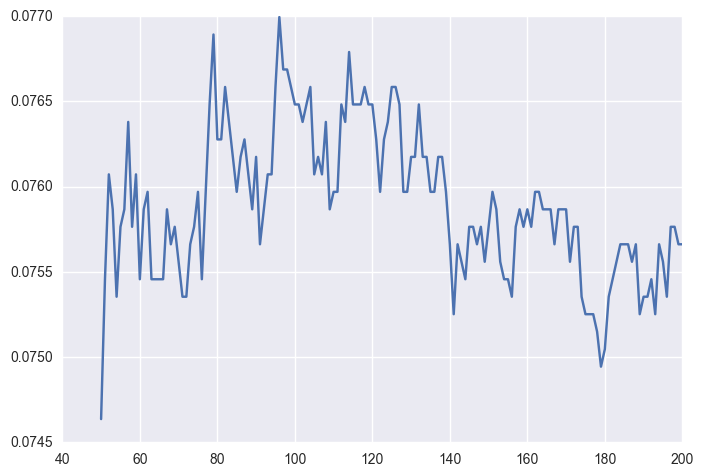

In [358]:
FindBestEstimatorRandomForest(x_feature_selected,data_train["label"])

200


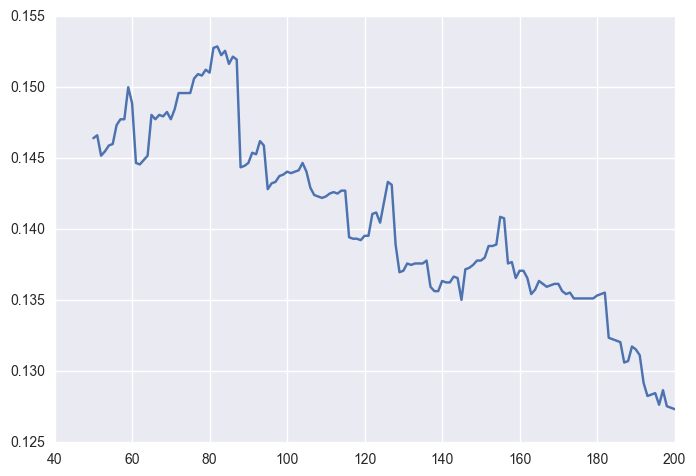

In [258]:
FindBestEstimatorExtraTreesClassifier(data_train_subset_normalized,data_train["label"])

147


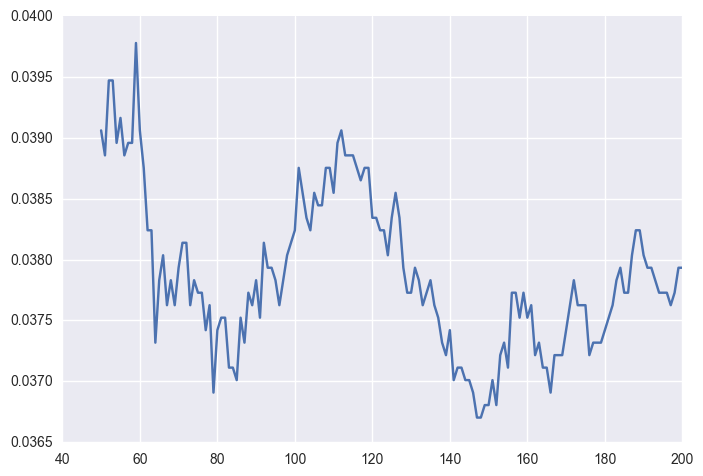

In [448]:
FindBestEstimatorRandomForest(X_transformed,data_train["label"])

187


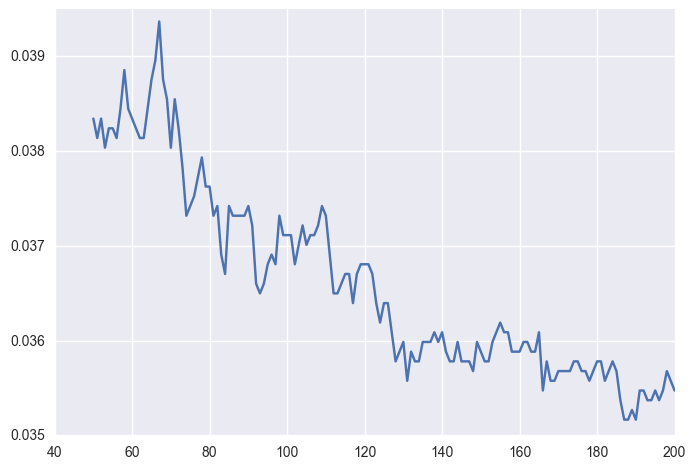

In [90]:
FindBestEstimatorRandomForest(X_transformed,data_train["label"])

194


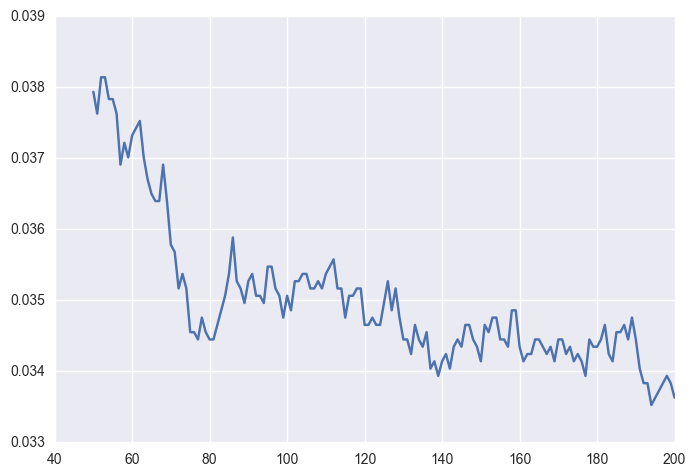

In [449]:
FindBestEstimatorExtraTreesClassifier(X_transformed,data_train["label"])

170


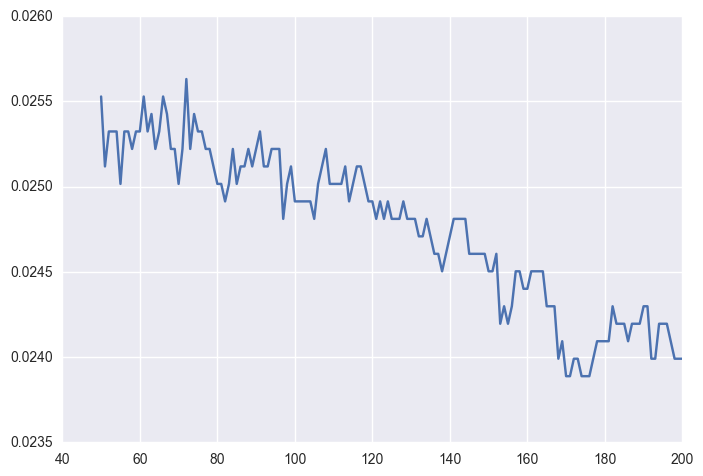

In [131]:
FindBestEstimatorExtraTreesClassifier(total_textual_features,data_train["label"])

126


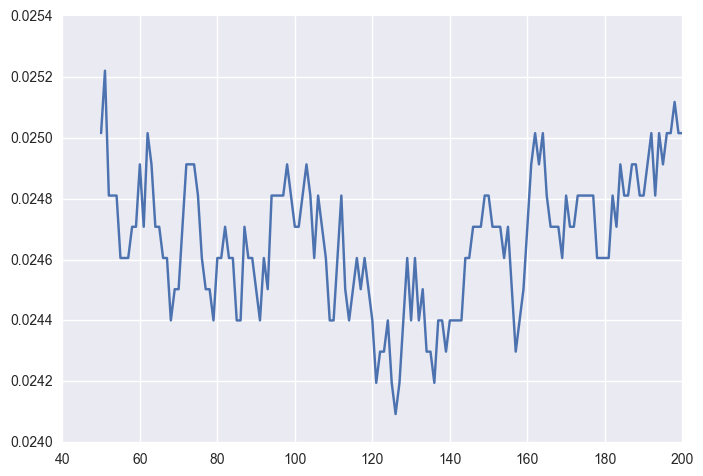

In [129]:
FindBestEstimatorRandomForest(total_textual_features,data_train["label"])

In [ ]:
score=CrossValidation_GradientBoostinlassifier(X_transformed,data_train["label"])
print(score)

In [180]:
result_svd=[]

#score=CrossValidation_NaiveBayesClassifier(X_transformed,data_train["label"])
#print(score)
#result_svd.append(score)
score=CrossValidation_DecisionTreeClassifier(X_transformed,data_train["label"])
print(score)
result_svd.append(score)
score=CrossValidation_KNearestNeighbours(X_transformed,data_train["label"],10)
print(score)
result_svd.append(score)
score=CrossValidation_RandomForestn192(X_transformed,data_train["label"])
print(score)
result_svd.append(score)
score=CrossValidation_LogisticRegression(X_transformed,data_train["label"])
print(score)
result_svd.append(score)
score=CrossValidation_LogisticRegression_AdaboostClassifier(X_transformed,data_train["label"])
print(score)
result_svd.append(score)
score=CrossValidation_ExtraTreesClassifiern197(X_transformed,data_train["label"])
print(score)
result_svd.append(score)

[0.93602544388807851]
[0.79700210172341313]
[0.96770607398066422]
[0.64588820985950668]
[0.95058381632036182]
[0.96545018915510705]


In [179]:
result_no_svd=[]

#score=CrossValidation_NaiveBayesClassifier(total_textual_features,data_train["label"])
#print(score)
#result_no_svd.append(score)
score=CrossValidation_DecisionTreeClassifier(total_textual_features,data_train["label"])
print(score)
result_no_svd.append(score)
score=CrossValidation_KNearestNeighbours(total_textual_features,data_train["label"],10)
print(score)
result_no_svd.append(score)
score=CrossValidation_RandomForestn192(total_textual_features,data_train["label"])
print(score)
result_no_svd.append(score)
score=CrossValidation_LogisticRegression(total_textual_features,data_train["label"])
print(score)
result_no_svd.append(score)
score=CrossValidation_LogisticRegression_AdaboostClassifier(total_textual_features,data_train["label"])
print(score)
result_no_svd.append(score)
score=CrossValidation_ExtraTreesClassifiern197(total_textual_features,data_train["label"])
print(score)
result_no_svd.append(score)

[0.96770550276649703]
[0.79618158890290036]
[0.97026733921815878]
[0.64588820985950668]
[0.97180591149837681]
[0.97088293400588488]


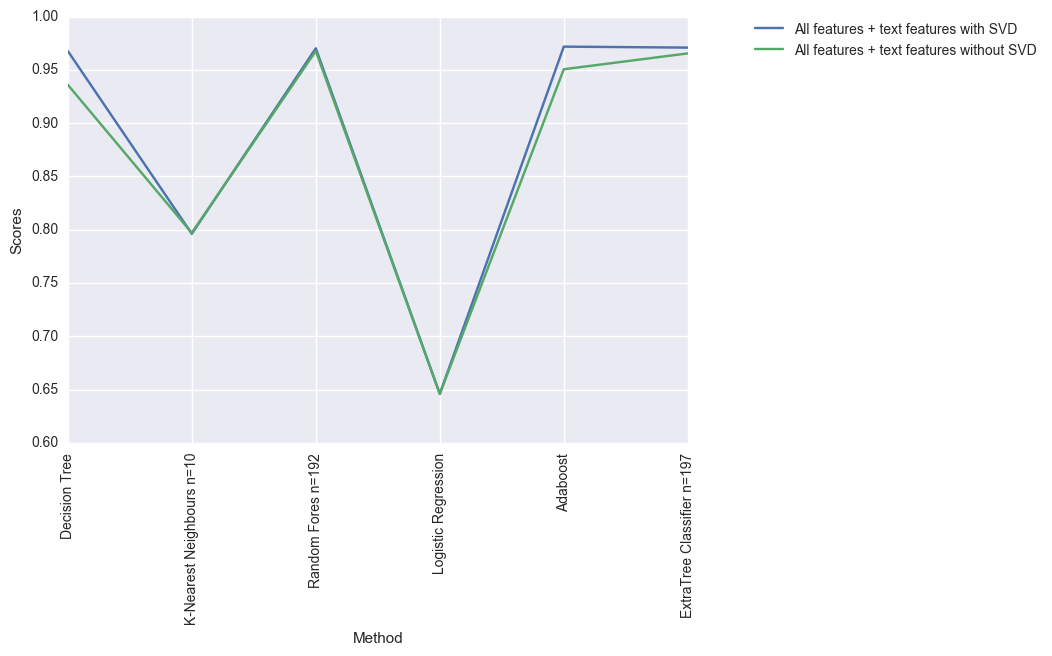

In [182]:
plt.plot(result_no_svd, label = "All features + text features with SVD")
plt.plot(result_svd, label = "All features + text features without SVD")

labels = ["Decision Tree","K-Nearest Neighbours n=10","Random Fores n=192","Logistic Regression","Adaboost","ExtraTree Classifier n=197"]
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Method')
plt.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
plt.show()

In [356]:
CrossValidation_(x_feature_selected,data_train["label"])

[0.91829045817570398]

88


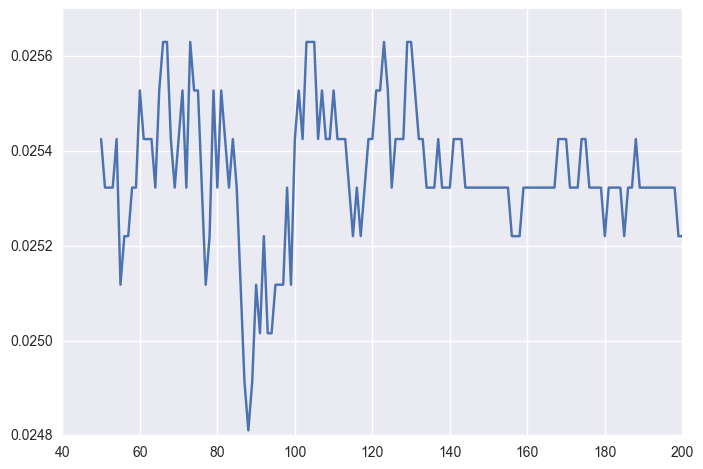

In [93]:
FindBestEstimatorRandomForest(total_textual_features,data_train["label"])

138


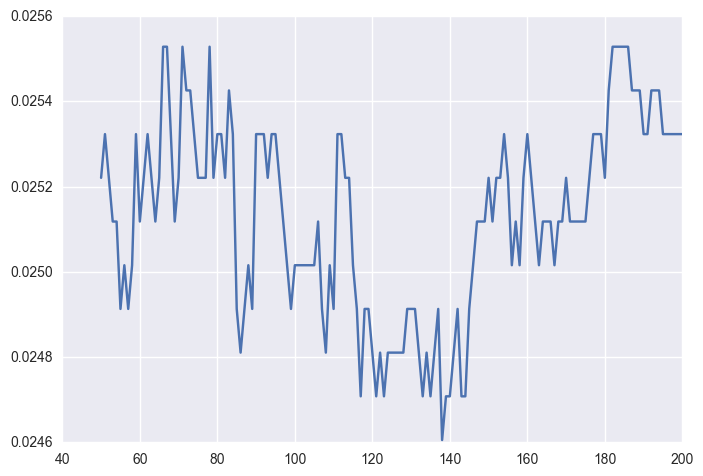

In [191]:
FindBestEstimatorRandomForest(total_textual_features,data_train["label"])

118


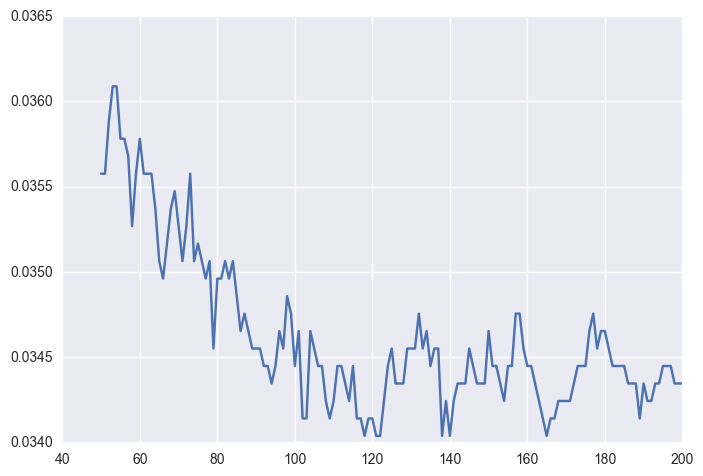

In [148]:
FindBestEstimatorRandomForest(total_textual_features_ngram,data_train["label"])

In [151]:
CrossValidation_RandomForestn118(total_textual_features_ngram,data_train["label"])

[0.96360277427490559]

In [ ]:
CrossValidation_RandomForestn194(total_textual_features,data_train["label"])

In [133]:
CrossValidation_RandomForestn126(total_textual_features,data_train["label"])

[0.970779949558638]

In [94]:
CrossValidation_RandomForestn187(X_transformed,data_train["label"])

[0.96873097940311048]

In [119]:
CrossValidation_RandomForestn157(X_transformed,data_train["label"])

[0.96709016393442615]

In [122]:
CrossValidation_RandomForestn195(X_transformed,data_train["label"])

[0.96903804119377879]

In [178]:
CrossValidation_RandomForestn88(total_textual_features,data_train["label"])

[0.97057503152585112]

In [130]:
 CrossValidation_ExtraTreesClassifiern136(total_textual_features,data_train["label"])

[0.97057492643968057]

In [135]:
CrossValidation_ExtraTreesClassifiern197(X_transformed,data_train["label"])

[0.96411706599411517]

In [137]:
CrossValidation_ExtraTreesClassifiern170(total_textual_features,data_train["label"])

[0.97088272383354357]

In [261]:
CrossValidation_RandomForestn80(data_train_subset_normalized,data_train["label"])

[0.67326061370323653]

In [263]:
CrossValidation_ExtraTreesClassifiern200(data_train_subset_normalized,data_train["label"])

[0.88117664985287936]

In [146]:
sha256 = data_test_df["sha256"]
sha = list(sha256)

In [145]:
#clf = RandomForestClassifier(n_estimators=70)
clf=ExtraTreesClassifier(n_estimators=197)
#clf.fit(total_textual_features,data_train['label'])
clf.fit(X_transformed,data_train['label'])

#pred= clf.predict(total_textual_features_test)
pred= clf.predict(X_test_transformed)

In [115]:
#print list(pred)

In [147]:
mymap_cat = {0:'benign',1: 'malicious'}
pred_new = pd.Series(pred).map(mymap_cat).astype(str)

In [148]:

def writePrediction(sha,Y_testData):
    y= open("Prediction_allfeat(+debug).ExtraTree197.csv","w")
    y.write("sha256,label" + "\n")
    for i in xrange(len(Y_testData)):
        y.write(str(sha256[i]) + "," + str((Y_testData[i]))+ "\n")
    y.close()

In [118]:
pred_new.value_counts()

malicious    23635
benign       23149
dtype: int64

In [119]:
pred_new[0]

'benign'

In [150]:
writePrediction(sha,pred_new)

In [121]:
check_pred = pd.read_csv("Prediction_text_allfeatures97.02RF.csv")

In [122]:
check_pred['label'].value_counts() 

malicious    23635
benign       23149
Name: label, dtype: int64

In [127]:
check_pred = pd.read_csv("Prediction_text_allfeatures96.99rf.csv") #95.4,RF

In [128]:
check_pred['label'].value_counts() 

malicious    25119
benign       21665
Name: label, dtype: int64

In [137]:
check_pred = pd.read_csv("Prediction_text_allfeatures97.05ET.csv")

In [138]:
check_pred['label'].value_counts() #95.385,ET

malicious    25099
benign       21685
Name: label, dtype: int64

In [126]:
writePrediction(sha,pred_new)

In [127]:
check_pred = pd.read_csv("Prediction_allfeatures.RF157.csv")

In [128]:
check_pred['label'].value_counts()

malicious    23466
benign       23318
Name: label, dtype: int64

In [143]:
check_pred = pd.read_csv("Prediction_textonly.ExtraTree170.csv")

In [144]:
check_pred['label'].value_counts()

malicious    25094
benign       21690
Name: label, dtype: int64

In [151]:
check_pred = pd.read_csv("Prediction_allfeat(+debug).ExtraTree197.csv")

In [152]:
check_pred['label'].value_counts()

benign       23535
malicious    23249
Name: label, dtype: int64